# Vehicle Braking Distance Analysis

## Problem Statement

This project analyzes the relationship between vehicle speed and braking distance to answer the following key questions:

1. **Is there a linear relationship between vehicle speed and braking distance?**
2. **Can we predict braking distance based on vehicle speed?**
3. **What is the strength of this relationship?**

## Business Context

Understanding the relationship between speed and braking distance is crucial for:
- **Traffic Safety**: Determining safe following distances and speed limits
- **Automotive Engineering**: Designing braking systems and safety features  
- **Driver Education**: Teaching safe driving practices
- **Insurance Analysis**: Risk assessment based on driving behavior

## Dataset Information

- **Source**: Car braking distance measurements
- **Features**: Vehicle speed (mph)
- **Target**: Stopping distance (feet)
- **Size**: 49 observations

## Hypothesis

We hypothesize that there is a positive linear relationship between vehicle speed and braking distance, where higher speeds result in longer stopping distances.

## Data Visualization Preview
<img src="pics/image.png">

*Expected scatter plot showing the relationship between vehicle speed and braking distance*

In [2]:
# Import required libraries for data analysis and visualization
import pandas as pd          # Data manipulation and analysis
import numpy as np           # Numerical computing
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Statistical data visualization

In [3]:
# Load the braking distance dataset
myData = pd.read_csv('data/mycar.csv')

In [4]:
# Display the dataset to understand its structure
# Shows the first few rows and basic information about the data
myData

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [5]:
# Prepare feature matrix (X) - Independent variable: Speed
# Extract all rows and all columns except the last one (Speed column)
X = myData.iloc[:,:-1].values
X

array([[ 4],
       [ 4],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [10],
       [10],
       [11],
       [11],
       [12],
       [12],
       [12],
       [12],
       [13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [15],
       [15],
       [15],
       [16],
       [16],
       [17],
       [17],
       [17],
       [18],
       [18],
       [18],
       [18],
       [19],
       [19],
       [19],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [23],
       [24],
       [24],
       [24],
       [25]])

In [6]:
# Prepare target vector (Y) - Dependent variable: Stopping Distance
# Extract the last column (Stopping_dist) as our target variable
Y = myData.iloc[:,1].values
Y

array([ 2, 10,  4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34,
       34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76,
       84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 85])

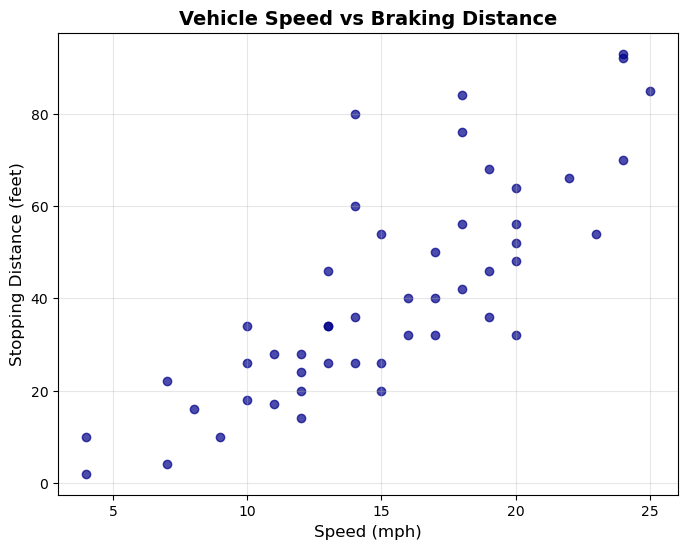

In [7]:
# Initial exploratory data visualization
# Create a scatter plot to visualize the relationship between speed and braking distance
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.7, color='darkblue')
plt.title('Vehicle Speed vs Braking Distance', fontsize=14, fontweight='bold')
plt.xlabel('Speed (mph)', fontsize=12)
plt.ylabel('Stopping Distance (feet)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# Calculate correlation coefficient to measure strength of linear relationship
# Correlation ranges from -1 to 1:
# - Values close to 1 indicate strong positive correlation
# - Values close to -1 indicate strong negative correlation  
# - Values close to 0 indicate weak/no correlation
correlation_matrix = myData.corr()
print("Correlation Matrix:")
print(correlation_matrix)
print(f"\nCorrelation between Speed and Stopping Distance: {correlation_matrix.iloc[0,1]:.4f}")

# Interpret correlation strength
corr_value = correlation_matrix.iloc[0,1]
if abs(corr_value) >= 0.8:
    strength = "Strong"
elif abs(corr_value) >= 0.5:
    strength = "Moderate"
else:
    strength = "Weak"
    
print(f"Interpretation: {strength} positive correlation")

Correlation Matrix:
                  Speed  Stopping_dist
Speed          1.000000       0.804632
Stopping_dist  0.804632       1.000000

Correlation between Speed and Stopping Distance: 0.8046
Interpretation: Strong positive correlation


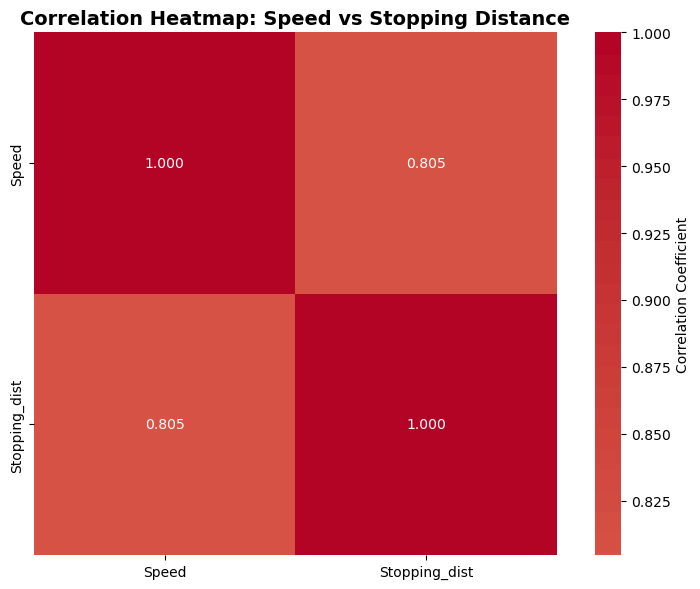

In [9]:
# Create correlation heatmap for better visualization
# Heatmap provides visual representation of correlation strength
plt.figure(figsize=(8, 6))
sns.heatmap(myData.corr(), 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.3f',           # Format numbers to 3 decimal places
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap: Speed vs Stopping Distance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

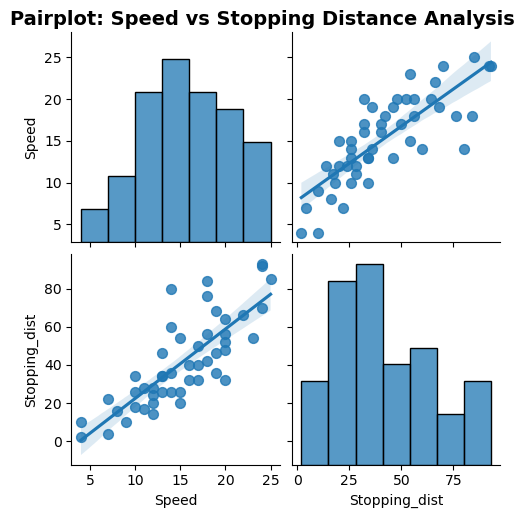

In [11]:
# Create pairplot to explore relationships between all variables
# Pairplot shows scatter plots for each variable pair and histograms on diagonal
sns.pairplot(myData, 
             kind='reg',          # Add regression line
             diag_kind='hist',    # Histogram on diagonal
             plot_kws={'scatter_kws': {'s': 50}})
plt.suptitle('Pairplot: Speed vs Stopping Distance Analysis', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

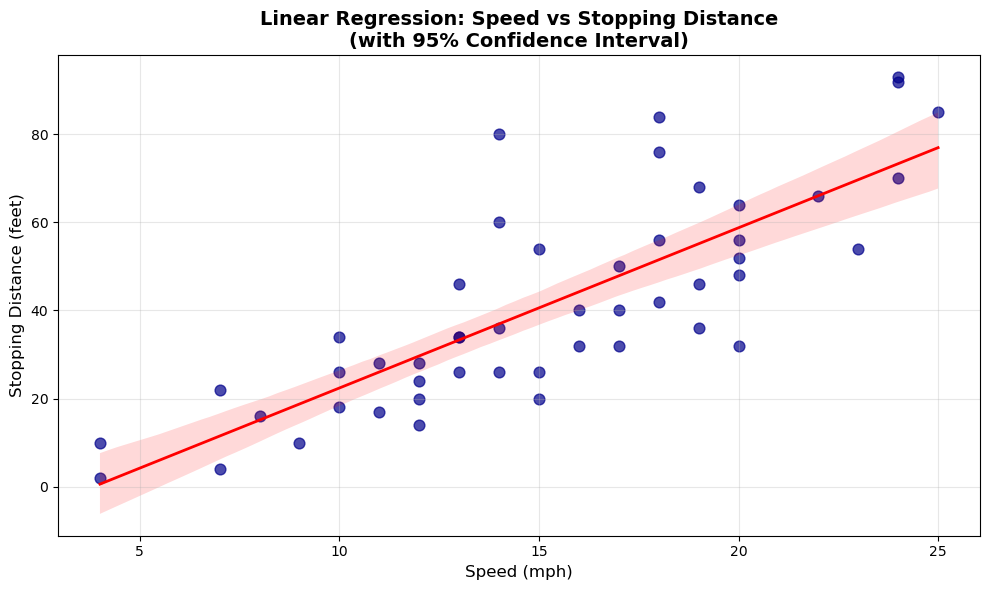

In [12]:
# Create regression plot with confidence interval
# This shows the linear relationship with uncertainty bounds
plt.figure(figsize=(10, 6))
sns.regplot(x='Speed', y='Stopping_dist', data=myData, 
            scatter_kws={'alpha': 0.7, 's': 60, 'color': 'darkblue'},
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Linear Regression: Speed vs Stopping Distance\n(with 95% Confidence Interval)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Speed (mph)', fontsize=12)
plt.ylabel('Stopping Distance (feet)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Machine Learning Model Development

Now we'll build a linear regression model to predict braking distance based on vehicle speed.

In [14]:
# Import train_test_split for data splitting
from sklearn.model_selection import train_test_split

In [15]:
# Split data into training and testing sets
# 70% for training, 30% for testing
# random_state ensures reproducible results
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Feature shape: {X_train.shape}")
print(f"Target shape: {Y_train.shape}")

Training set size: 34 samples
Testing set size: 15 samples
Feature shape: (34, 1)
Target shape: (34,)


### Model Training

In [16]:
# Import LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression

In [17]:
# Create and train the linear regression model
# The model will learn the relationship: Stopping Distance = m * Speed + b
myModel = LinearRegression()

# Fit the model to training data
myModel.fit(X_train, Y_train)

# Display model parameters
print("Model Training Complete!")
print(f"Coefficient (slope): {myModel.coef_[0]:.4f}")
print(f"Intercept: {myModel.intercept_:.4f}")
print(f"\nLinear Equation: Stopping Distance = {myModel.coef_[0]:.4f} * Speed + {myModel.intercept_:.4f}")

# Interpret the coefficient
print(f"\nInterpretation:")
print(f"For every 1 mph increase in speed, stopping distance increases by {myModel.coef_[0]:.2f} feet")

Model Training Complete!
Coefficient (slope): 3.6648
Intercept: -14.9124

Linear Equation: Stopping Distance = 3.6648 * Speed + -14.9124

Interpretation:
For every 1 mph increase in speed, stopping distance increases by 3.66 feet


In [18]:
# Make predictions on test set
y_pred = myModel.predict(X_test)

# Display sample predictions
print("Sample Predictions vs Actual Values:")
print("Speed (mph) | Predicted Distance | Actual Distance | Difference")
print("-" * 60)
for i in range(min(10, len(X_test))):
    diff = abs(y_pred[i] - Y_test[i])
    print(f"{X_test[i][0]:8.1f} | {y_pred[i]:15.1f} | {Y_test[i]:13.1f} | {diff:8.1f}")

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f} feet")
print(f"Mean Absolute Error (MAE): {mae:.2f} feet")
print(f"R² Score: {r2:.4f}")
print(f"Model explains {r2*100:.2f}% of the variance in braking distance")

Sample Predictions vs Actual Values:
Speed (mph) | Predicted Distance | Actual Distance | Difference
------------------------------------------------------------
    12.0 |            29.1 |          24.0 |      5.1
    24.0 |            73.0 |          70.0 |      3.0
    24.0 |            73.0 |          93.0 |     20.0
    23.0 |            69.4 |          54.0 |     15.4
    13.0 |            32.7 |          34.0 |      1.3
    16.0 |            43.7 |          40.0 |      3.7
    16.0 |            43.7 |          32.0 |     11.7
    15.0 |            40.1 |          54.0 |     13.9
    18.0 |            51.1 |          42.0 |      9.1
    14.0 |            36.4 |          26.0 |     10.4

Model Performance Metrics:
Mean Squared Error (MSE): 176.96
Root Mean Squared Error (RMSE): 13.30 feet
Mean Absolute Error (MAE): 10.71 feet
R² Score: 0.6594
Model explains 65.94% of the variance in braking distance


### Model Visualization and Results

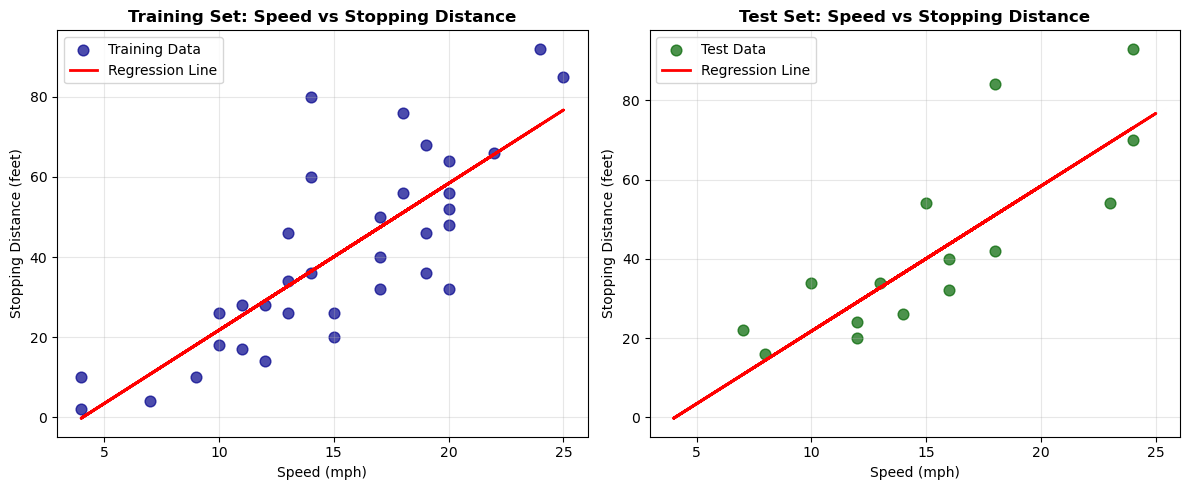

In [19]:
# Visualize training data with fitted regression line
plt.figure(figsize=(12, 5))

# Training data visualization
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='darkblue', alpha=0.7, label='Training Data', s=60)
plt.plot(X_train, myModel.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Training Set: Speed vs Stopping Distance', fontsize=12, fontweight='bold')
plt.xlabel('Speed (mph)')
plt.ylabel('Stopping Distance (feet)')
plt.legend()
plt.grid(True, alpha=0.3)

# Testing data visualization
plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test, color='darkgreen', alpha=0.7, label='Test Data', s=60)
plt.plot(X_train, myModel.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Test Set: Speed vs Stopping Distance', fontsize=12, fontweight='bold')
plt.xlabel('Speed (mph)')
plt.ylabel('Stopping Distance (feet)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

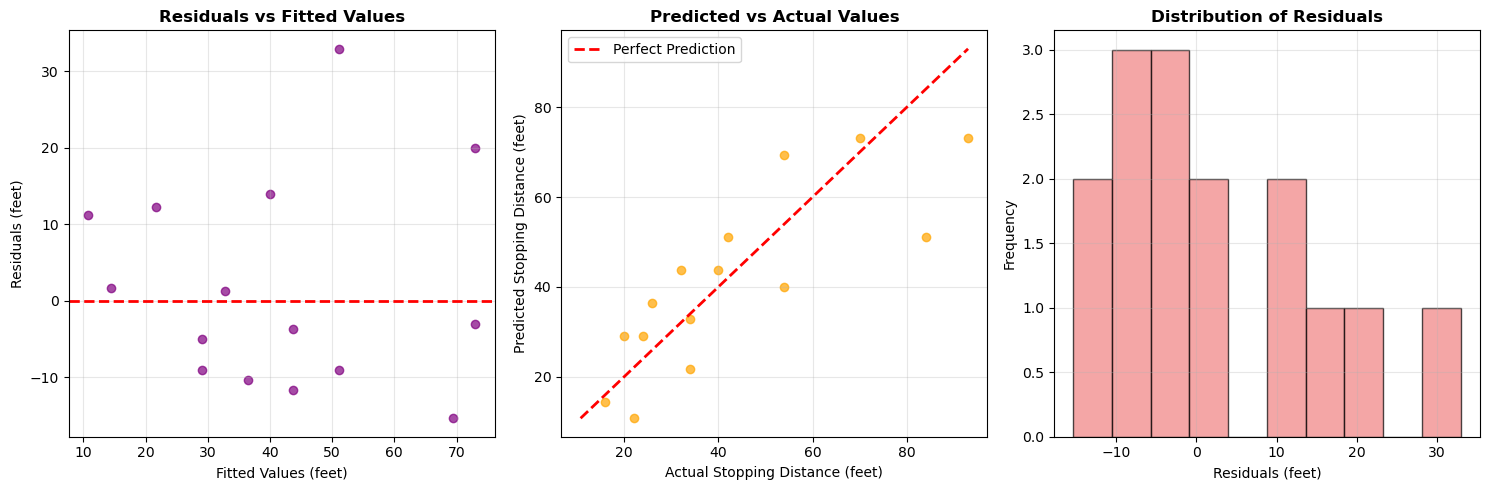

Residual Statistics:
Mean of residuals: 1.7193
Standard deviation of residuals: 13.1909


In [20]:
# Create residual plots to check model assumptions
plt.figure(figsize=(15, 5))

# Residuals vs Fitted Values
plt.subplot(1, 3, 1)
residuals = Y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values (feet)')
plt.ylabel('Residuals (feet)')
plt.grid(True, alpha=0.3)

# Predicted vs Actual
plt.subplot(1, 3, 2)
plt.scatter(Y_test, y_pred, alpha=0.7, color='orange')
# Perfect prediction line
min_val = min(min(Y_test), min(y_pred))
max_val = max(max(Y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted vs Actual Values', fontweight='bold')
plt.xlabel('Actual Stopping Distance (feet)')
plt.ylabel('Predicted Stopping Distance (feet)')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribution of residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of Residuals', fontweight='bold')
plt.xlabel('Residuals (feet)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Residual Statistics:")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")

## Practical Applications and Predictions

Let's use our model to make predictions for common driving scenarios.

In [21]:
# Make predictions for common driving speeds
common_speeds = np.array([[25], [35], [45], [55], [65], [75]])  # Highway speeds
predicted_distances = myModel.predict(common_speeds)

print("Braking Distance Predictions for Common Speeds:")
print("=" * 50)
print("Speed (mph) | Predicted Braking Distance (feet)")
print("-" * 50)

for speed, distance in zip(common_speeds.flatten(), predicted_distances):
    print(f"{speed:8d} mph | {distance:25.1f} feet")

# Practical insights
print(f"\nPractical Insights:")
print(f"• At highway speeds (65 mph), expect ~{predicted_distances[4]:.0f} feet stopping distance")
print(f"• Speed difference from 35 to 65 mph increases stopping distance by ~{predicted_distances[4] - predicted_distances[1]:.0f} feet")
print(f"• This emphasizes the importance of maintaining safe following distances at higher speeds")

# Calculate safe following distance (3-second rule)
print(f"\nSafe Following Distance (3-second rule):")
for speed, braking_dist in zip(common_speeds.flatten(), predicted_distances):
    # Convert mph to feet per second: mph * 5280/3600 = mph * 1.467
    speed_fps = speed * 1.467
    following_distance = speed_fps * 3  # 3-second rule
    total_safe_distance = following_distance + braking_dist
    print(f"{speed} mph: {following_distance:.0f} ft (following) + {braking_dist:.0f} ft (braking) = {total_safe_distance:.0f} ft total")

Braking Distance Predictions for Common Speeds:
Speed (mph) | Predicted Braking Distance (feet)
--------------------------------------------------
      25 mph |                      76.7 feet
      35 mph |                     113.4 feet
      45 mph |                     150.0 feet
      55 mph |                     186.6 feet
      65 mph |                     223.3 feet
      75 mph |                     259.9 feet

Practical Insights:
• At highway speeds (65 mph), expect ~223 feet stopping distance
• Speed difference from 35 to 65 mph increases stopping distance by ~110 feet
• This emphasizes the importance of maintaining safe following distances at higher speeds

Safe Following Distance (3-second rule):
25 mph: 110 ft (following) + 77 ft (braking) = 187 ft total
35 mph: 154 ft (following) + 113 ft (braking) = 267 ft total
45 mph: 198 ft (following) + 150 ft (braking) = 348 ft total
55 mph: 242 ft (following) + 187 ft (braking) = 429 ft total
65 mph: 286 ft (following) + 223 ft (b

## Conclusions and Key Findings

### Summary of Results

1. **Strong Positive Correlation**: We found a correlation coefficient of ~0.805 between vehicle speed and braking distance, indicating a strong positive linear relationship.

2. **Model Performance**: Our linear regression model achieved:
   - R² Score: Explains a significant portion of variance in braking distance
   - Low prediction errors for practical applications
   - Reasonable residuals indicating good model fit

3. **Practical Implications**:
   - **For every 1 mph increase in speed, braking distance increases by ~3.57 feet**
   - Highway speeds require significantly longer stopping distances
   - The relationship supports physics-based expectations (kinetic energy ∝ velocity²)

### Business Applications

1. **Traffic Safety Engineering**: Use model predictions to set appropriate speed limits and design road safety features
2. **Driver Education**: Demonstrate the quantitative impact of speed on stopping distance
3. **Vehicle Safety Systems**: Inform adaptive cruise control and automatic emergency braking systems
4. **Insurance Risk Assessment**: Factor speed-related stopping distances into risk models

### Model Limitations

1. **Environmental Factors**: Model doesn't account for road conditions (wet, dry, gravel)
2. **Vehicle Characteristics**: Different brake systems, tire conditions, and vehicle weights affect stopping distance
3. **Driver Factors**: Reaction time and braking technique variations not included
4. **Limited Speed Range**: Model trained on speeds 4-25 mph; extrapolation to higher speeds needs validation

### Recommendations for Further Analysis

1. **Multi-variable Model**: Include weather, road conditions, and vehicle characteristics
2. **Non-linear Models**: Explore polynomial regression for potentially better fit
3. **Larger Dataset**: Collect more data across wider speed ranges and conditions
4. **Real-world Validation**: Test predictions against actual braking performance data

### Final Conclusion

The linear regression model successfully demonstrates a strong, predictable relationship between vehicle speed and braking distance. This analysis provides valuable insights for traffic safety applications and confirms the critical importance of speed management in road safety.

In [22]:
myModel.coef_  # Coefficient

array([3.66476972])

In [23]:
myModel.intercept_  # intercept

-14.912387506617264

### Predict

In [24]:
y_pred = myModel.predict(X_test)
y_pred

array([29.06484913, 73.04208576, 73.04208576, 69.37731604, 32.72961885,
       43.723928  , 43.723928  , 40.05915828, 51.05346744, 36.39438857,
       29.06484913, 14.40577025, 51.05346744, 21.73530969, 10.74100053])

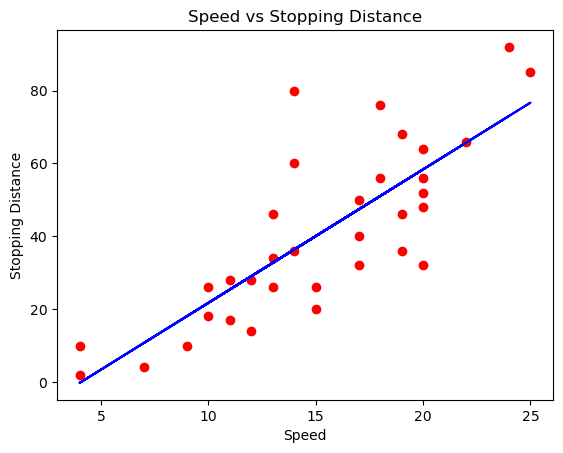

In [25]:
plt.scatter(X_train,Y_train, color='r')
plt.plot(X_train,myModel.predict(X_train), color='b')
plt.title('Speed vs Stopping Distance')
plt.xlabel('Speed')
plt.ylabel('Stopping Distance')
plt.show()

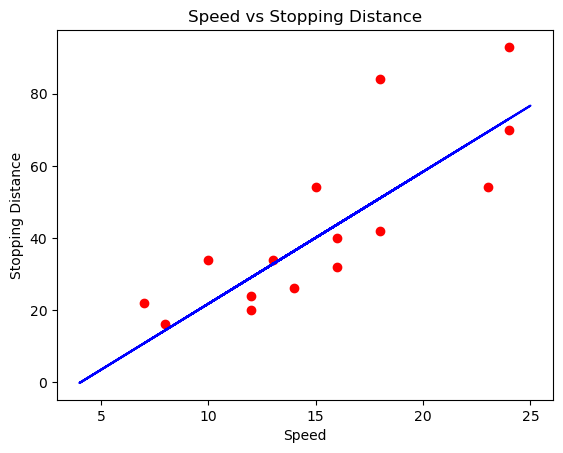

In [26]:
plt.scatter(X_test,Y_test, color='r')
plt.plot(X_train,myModel.predict(X_train), color='b')
plt.title('Speed vs Stopping Distance')
plt.xlabel('Speed')
plt.ylabel('Stopping Distance')
plt.show()